In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')
df.shape

(42000, 785)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x=df.values[:,1:]
y=df.values[:,0]
x.shape,y.shape

((42000, 784), (42000,))

In [8]:
#train-test split

split=int(0.8*x.shape[0])

xtrain=x[:split,:]
ytrain=y[:split]

xtest=x[split:,:]
ytest=y[split:]


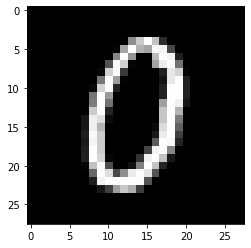

0


In [9]:
def drawImg(sample):
    
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

drawImg(xtrain[5])
print(ytrain[5])

In [10]:
# knn--

def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))


In [18]:
def knn(x,y,query_point,k=5):
    
    values=[]
    
    for i in range (xtrain.shape[0]):
        
        d=distance(query_point,x[i])
        values.append((d,y[i]))
    
    vals=sorted(values)
    vals=vals[:k]
    
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1], return_counts=True)  #passing y values
    
    index=new_vals[1].argmax()
    
    pred=new_vals[0][index]
    
    return pred
        
        

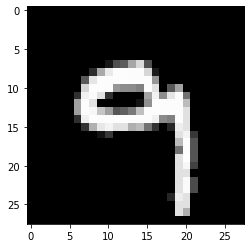

9

In [20]:
pred=knn(xtrain,ytrain,xtest[26])
drawImg(xtest[26])
ytest[26]

In [23]:
def accuracy(x,y,xtest,ytest):
    
    arr=[]
    
    for i in range(xtest.shape[0]):
        pred=knn(x,y,xtest[i])
        arr.append(pred)
        
    y_pred=np.array(arr)
    
    return float((y_pred==ytest).sum()/ytest.shape[0])

In [ ]:
accuracy(xtrain,ytrain,xtest,ytest)